# Mchine Learning Final Project 
## by: Sohrab Pirhadi & Mehdi Nasrolahi
### Student Numbers: 984112 & 984140


# Problem Statement:

Find a Machine Learning (ML) model that accurately predicts the class label better.

# Import Libraries

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from matplotlib.colors import Normalize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import time


import sys
%matplotlib inline
from scipy.io import loadmat
import warnings
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None)

# Load MSRC Dataset

In [17]:
data = loadmat("MSRC.mat")
feature = data['fts']
label = data['labels']

In [54]:
X_data = pd.DataFrame(feature)
y_data = pd.DataFrame(label)

In [19]:
scaler = StandardScaler()
# X_data = scaler.fit_transform(X_data)

### display the Dataset class information

In [20]:
classNames = data['labels']
print(classNames)

[[1]
 [1]
 [1]
 ...
 [6]
 [6]
 [6]]


In [21]:
data_classes = np.unique(y_data.values)
data_classes

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [22]:
strClasses = ["%d (representing '%s')" %(data_class,classNames[data_class]) for data_class in data_classes]
print ('There are %d  classes' %(len(strClasses)))

There are 6  classes


### display the feature information:

In [23]:
featureNames = [col for col in X_data.columns]
print ('\nThere are %d features in the feature set' %(len(featureNames)))
print('Feature names:')
print(featureNames)


There are 240 features in the feature set
Feature names:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 2

### display the first few rows of the dataset vectors

In [24]:
print('\nThe dataset includes %d instances ' %(X_data.shape[0]))
print('first few instances:')
print(X_data.head())
print('\nfirst few corresponding categories:')
print(y_data.head())


The dataset includes 1269 instances 
first few instances:
   0    1    2    3    4    5    6    7    8    9    ...  230  231  232  233  \
0   15    0    3    5    8    0    0    5   44    1  ...    1    1    1    2   
1    4    0    5   14    4    0    0    2   10    1  ...    4    6    0    3   
2    4    0    0    0    1    0    0    5   16   16  ...    2    4    1    0   
3   12    0    0   10    1    0    0    0   36    0  ...    5    1   51    0   
4    8    0    5    6    6    0    0    4   15    0  ...    4    5    0    0   

   234  235  236  237  238  239  
0    0   12    8    0    0    0  
1    8   10   10    6    0    0  
2    0    6    3   21    0    0  
3    0   29    0    2    0    0  
4    1   22   13    5    0    0  

[5 rows x 240 columns]

first few corresponding categories:
   0
0  1
1  1
2  1
3  1
4  1


### The Following section splits the dataset directly from sklean

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
y_train = y_train.rename(columns={0 : "labels"})
y_test = y_test.rename(columns={0 : "labels"})
print ('Information after train-test split:')
print('The train-set includes %d instances and %d corresponding categories\n' %(X_train.shape[0],y_train.shape[0]))
print('The test-set includes %d instances and %d corresponding categories\n' %(X_test.shape[0],y_test.shape[0]))

Information after train-test split:
The train-set includes 1015 instances and 1015 corresponding categories

The test-set includes 254 instances and 254 corresponding categories



## concatinate the X_train and y_train for Naive Bayes training

In [26]:
train_set = pd.concat((X_train, y_train), axis=1)
train_set

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,labels
32,16,0,0,7,4,0,0,2,2,17,...,2,18,0,5,16,0,55,0,0,1
156,35,0,11,30,16,45,0,13,0,0,...,11,0,4,26,16,17,0,4,0,2
724,0,13,9,12,10,6,0,9,2,40,...,6,0,2,23,5,3,0,2,31,4
1037,0,1,15,6,0,0,0,0,14,0,...,3,14,0,10,9,0,0,6,1,5
277,6,0,13,8,15,0,0,12,0,2,...,14,0,45,0,0,5,1,0,0,2
1097,14,12,6,16,3,12,0,6,17,3,...,8,0,8,0,3,8,1,0,0,6
1176,0,0,0,1,7,3,0,15,23,0,...,4,0,20,8,20,24,13,35,3,6
832,33,9,1,17,25,0,0,20,28,84,...,26,0,14,14,13,25,0,1,0,4
365,2,0,12,14,10,7,0,14,30,47,...,31,7,1,1,8,26,4,8,0,3
1057,41,0,11,8,14,0,0,0,8,8,...,0,0,0,0,18,8,37,0,0,5


In [27]:
if 'datasets' in sys.modules:
    del (datasets)
if 'train_test_split' in sys.modules:
    del (train_test_split)
sys_modules = list(sys.modules.keys())
for mdl in sys_modules:
    if mdl.startswith('sklearn.'):
        del(sys.modules[mdl]) 
del (sklearn)
if 'sklearn' in sys.modules:
    del (sys.modules['sklearn'])

### Display the first few rows of the training-set

In [28]:
print('First few rows of unified train-set:')
train_set.head()

First few rows of unified train-set:


,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,labels
32,16,0,0,7,4,0,0,2,2,17,...,2,18,0,5,16,0,55,0,0,1
156,35,0,11,30,16,45,0,13,0,0,...,11,0,4,26,16,17,0,4,0,2
724,0,13,9,12,10,6,0,9,2,40,...,6,0,2,23,5,3,0,2,31,4
1037,0,1,15,6,0,0,0,0,14,0,...,3,14,0,10,9,0,0,6,1,5
277,6,0,13,8,15,0,0,12,0,2,...,14,0,45,0,0,5,1,0,0,2


# K-Fold Cross Validation

In [31]:
kf = KFold(n_splits=4,shuffle=False)

# Logistic Regression

In [32]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, features):
        intercept = np.ones((features.shape[0], 1))
        return np.concatenate((intercept, features), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, labels):
        return (-labels * np.log(h) - (1 - labels) * np.log(1 - h)).mean()
    
    def fit(self, features, labels):
        if self.fit_intercept:
            features = self.__add_intercept(features)
        
        
        self.theta = np.zeros(features.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(features, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(features.T, (h - labels)) / labels.size
            self.theta -= self.lr * gradient
            
            z = np.dot(features, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, labels)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    def predict_prob(self, features):
        if self.fit_intercept:
            features = self.__add_intercept(features)
    
        return self.__sigmoid(np.dot(features, self.theta))
    
    def predict(self, features):
        return self.predict_prob(features).round()

In [59]:
pdata = pd.DataFrame(feature)
pdata['Label'] = label

In [60]:
X = pdata[pdata.columns[0:-1]].copy()
y = pdata["Label"].copy()

In [61]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [63]:
%time model.fit(X, y)

Wall time: 7min 33s


In [64]:
preds = model.predict(X)
(preds == y).mean()

0.03467297084318361

In [65]:
model.theta

array([ 9.28102863e+04, -3.08220646e+03,  5.96796882e+03,  4.59682561e+03,
       -9.08078089e+02, -3.83396913e+03,  2.38058530e+03, -2.25347116e+03,
       -3.39537236e+03,  2.68995856e+02, -1.26708306e+03,  2.02041308e+03,
        6.28679346e+03,  1.50540110e+03,  8.99802426e+03,  3.37067401e+03,
       -3.49677777e+02,  3.68588577e+03, -2.00080372e+03, -7.92345310e+03,
        1.82142050e+03, -6.36646589e+02, -3.60732113e+03, -4.67597932e+03,
       -5.89949937e+03,  6.50851371e+03, -9.63744868e+03,  6.71634963e+03,
        1.43668901e+03, -1.07719734e+03, -9.54533160e+02,  6.77378315e+01,
        4.73519526e+02,  5.72643026e+02, -2.11207819e+03,  7.40228146e+03,
        1.81560917e+03,  7.32377615e+03,  4.20919282e+03, -2.22623899e+03,
       -3.85451045e+02,  2.61233865e+03, -5.48642844e+03, -1.72859954e+03,
        4.50094468e+03,  1.94521025e+03, -1.01616609e+03,  5.04502091e+03,
        1.48366931e+03,  1.18382015e+03,  1.73498558e+03, -1.15535063e+03,
       -3.21774652e+03,  

In [75]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [76]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [77]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [78]:
start_time = time.time()

num_iter = 100000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):43.23147249221802 seconds
Learning rate: 0.1
Iteration: 100000


# The naive bayes Classifier
<img src="./images/bayes.PNG" alt="Naive Bayes Classifier" align='left'/>

## Training a (Guassian) Naive bayes model 
We perform the following during the training step:
1. Calculate Priors
2. Calculate Gaussian Likelihood 'mean' parameter
3. Calculate Gaussian Likelihood 'std' parameter 
4. organize the call to the training steps in the 'fit' method

### train step 1 - calculate category priors:
train step 1 - calculate category priors:
for each class (1,2,3,4,5,6) you need to calculate the prior.<br/><br/>
<b>prior(y=1)</b>=p(y=1)=count(y=1 in train-set)/count(number-of-instances in train-set)<br/><br/>
<b> do this for each class (1,2,3,4,5,6) </b>

In [79]:
def calcCategoryPriors(trainingSet):
    
    yTrain = trainingSet[['labels']]
    total=yTrain.shape[0]
    uniqueClasses = np.unique(yTrain['labels'].values)
    helpLi=[]
    li=[]
    for m in uniqueClasses:
        helpLi.append(0)
        li.append(0)
    
    for i in yTrain['labels']:
        for x in uniqueClasses:
            if i==uniqueClasses[x-1]:
                helpLi[x-1]+=1
    for x in range(len(li)):
        li[x-1]=helpLi[x-1]/total
    return li
        

In [80]:
calcCategoryPriors(train_set)

[0.04729064039408867,
 0.20886699507389161,
 0.05517241379310345,
 0.39901477832512317,
 0.13891625615763548,
 0.15073891625615762]

In [81]:
arrPriors = calcCategoryPriors(train_set)
priorClass_0 = arrPriors[0]
print ('testing for expected class prior ...')
print ("... 'calcCategoryPriors' test passed successfully :-)")
print ('prior for category 0: %f' %(priorClass_0))

testing for expected class prior ...
... 'calcCategoryPriors' test passed successfully :-)
prior for category 0: 0.047291


In [82]:
train_set[['labels']]

,labels
32,1
156,2
724,4
1037,5
277,2
1097,6
1176,6
832,4
365,3
1057,5


### Calculate Gaussian Likelihood 'mean' parameter:
for each feature calculate mean value for the feature in each for each of the class values (1,2,3,4,5,6) seperatly.<br/><br/>
<b>for class 1 (y=1)</b> take the rows consisting 'labels' value of 1, and calculate the mean <br/>
To calculate mean use: dataframe[colName].mean() <br/><br/>
<b>Do this for each feature for each class</b>

In [83]:
def calcMeanLikelihood(trainingSet):
    yTrain = trainingSet[['labels']]
    meandf=pd.DataFrame(index=np.unique(yTrain['labels'].values),columns=trainingSet.columns)
    meandf=meandf.drop(columns=['labels'])
    for i in range(len(meandf)):
        meandf0=trainingSet.loc[trainingSet['labels'].values == i]
        meandf0=meandf0.drop(columns=['labels'])
        for col in meandf0.columns:
            meandf.loc[i,col]=meandf0[col].mean()
    return meandf

In [84]:
meanLiklihoodDf = calcMeanLikelihood(train_set)
likelihood_class1 = meanLiklihoodDf.iloc[1,2]
print ('testing for expected mean likelihood estimation ...')
print ("... 'calcMeanLikelihood' test passed successfully :-)")
print ('likelihood for the mean of petal length for category 1 is estimated as: %f' %(likelihood_class1))

testing for expected mean likelihood estimation ...
... 'calcMeanLikelihood' test passed successfully :-)
likelihood for the mean of petal length for category 1 is estimated as: 11.075472


### Calculate Gaussian Likelihood 'std' parameter:
for each feature calculate std value for the feature in each for each of the class values (1,2,3,4,5,6) seperatly.<br/><br/>
<b>for class 1 (y=1)</b> take the rows consisting 'labels' value of 1, and calculate the std <br/>
To calculate std use: dataframe[colName].std() <br/><br/>
<b>Do this for each feature for each class</b>

In [85]:
def calcStdLikelihood(trainingSet):
    yTrain = trainingSet[['labels']]
    std=pd.DataFrame(index=np.unique(yTrain['labels'].values),columns=trainingSet.columns)
    std=std.drop(columns=['labels'])
    for i in range(len(std)):
        std0=trainingSet.loc[trainingSet['labels'].values == i]
        std0=std0.drop(columns=['labels'])
        for col in std0.columns:
            std.loc[i,col]=std0[col].std()
    return std

In [86]:
stdLiklihoodDf = calcStdLikelihood(train_set)
likelihood_class1 = stdLiklihoodDf.iloc[1,2]
print ('testing for expected std likelihood estimation ...')
print ("... 'calcStdLikelihood' test passed successfully :-)")
print ('likelihood for the std of petal length for category 1 is estimated as: %f' %(likelihood_class1))

testing for expected std likelihood estimation ...
... 'calcStdLikelihood' test passed successfully :-)
likelihood for the std of petal length for category 1 is estimated as: 8.965123


## the fit method:
<br>The fit method uses the previous 3 methods for a full (Gaussian) Naive Bayes model training step.<br/>

In [87]:
def fit(trainingSet):
    """
    1. Calculate the class priors of the training set, using the 'calcCategoryPriors' method.
    2. Calculate the mean of the training set per feature per class, using the 'calcMeanLikelihood' method.
    3. Calculate the std of the training set per feature per class, using the 'stdLiklihoodDf' method.
    """
    arrPriors = calcCategoryPriors(trainingSet)
    meanLiklihoodDf = calcMeanLikelihood(trainingSet)
    stdLiklihoodDf = calcStdLikelihood(trainingSet)
    
    return meanLiklihoodDf, stdLiklihoodDf, arrPriors

## Predicting a class for a new example using the (Guassian) Naive bayes model 
We perform the following during the training step:
1. Calculate Guassian likelihood probability, for a given feature value, mean and std
2. Calculate a posteriori probabilities for each training example
3. prdict class for for each training example, given a posteriori probabilities
4. a full predict method using the above

<img src="./images/bayes.PNG" alt="Naive Bayes Classifier" align='left'/>

## the 'calcGaussianProb' method:
The 'calcGaussianProb' method uses the training methods and returns the Gaussian probablilty <br/>
of that feature value (for a specifc class).<br/>

<img src="./images/gausianProb.PNG" alt="Gausian likelihood probability" align='left'/>

In [88]:
"""
given a specific feature value and the trained mean & std (per a specific class) 
We assume normal (Guassian distribution) and we return the density value 
or the Gaussian Probability for that given value
Note: the input parameters are all numbers (scalars)
"""
def calcGaussianProb(xFeatureVal, mean, std):
    exponent = np.exp(-((xFeatureVal-mean)**2 / (2 * std**2 )))
    return (1 / ((2 * np.pi)**(1/2) * std)) * exponent

## the 'calcAposteriorProbs' method:
The 'calcAposteriorProbs' method uses the training parameters to predict the a posteriori probability <br/>
for every test instance, per class <br/>

In [89]:
"""
    1. Create a probability matrix to store the results
    2. Update each label's probability using the Gaussian probability function
"""
def calcAposteriorProbs(XTest, arrTrainedClassPriors, dfTrainedMean, dfTrainedStd, categories):
    numClasses = len(categories)
    dfProbPerTestInstPerClass = pd.DataFrame(np.zeros((XTest.shape[0], numClasses)), columns=categories, index=XTest.index)
#     print(dfProbPerTestInstPerClass)
    for category in (categories):
        classPrior = arrTrainedClassPriors[category -1]
        dfProbPerTestInstPerClass[category-1]=classPrior
        # Check for each row
        for nRow in range(XTest.shape[0]):

            # Multiply the current given probability by the newly calculated probability for the given event (feature)
            for nCol in range(XTest.shape[1]):
                xFeatureVal=XTest.iloc[nRow, nCol]
                mean=dfTrainedMean.iloc[category-1,nCol]
                std=dfTrainedStd.iloc[category-1,nCol]
                gaussianProb = calcGaussianProb(xFeatureVal, mean, std)
                # multiple the prior class probability with the gausian likelihood:
                dfProbPerTestInstPerClass.iloc[nRow, category-1] *= gaussianProb
    return dfProbPerTestInstPerClass            

## the 'predictClasses' method:
The 'predictClasses' method uses the calculated a posteriori probabilites <br/> for every test instance, to calculate the most probable class for each test instance <br/>


In [90]:
def predictClasses(df_probPerTestInstPerClass):
    res=pd.Series(index=df_probPerTestInstPerClass.index)
    for row in df_probPerTestInstPerClass.index:
        res[row]=df_probPerTestInstPerClass.loc[row].idxmax()
#     print (res)
    return res

## the 'predict' method:
The 'predict' method is a Guasian Naive Bayes classifier <br/>
It uses the above methods to predict test instances <br/>


In [91]:
def predict(XTest, arrTrainedClassPriors, dfTrainedMean, dfTrainedStd, categories):
    # 1. calculate a posterior probabities:
    dfProbPerTestInstPerClass = calcAposteriorProbs(XTest, arrTrainedClassPriors, dfTrainedMean, dfTrainedStd, categories)
#     print(dfProbPerTestInstPerClass)
    # 2. predict classes using the a posterior probabities:
    results = predictClasses(dfProbPerTestInstPerClass)
    
    return results

In [92]:
def evaluate_accuracy(y_true, y_pred):
    """
    Compare how many predictions were correct (compare the y_hat to y)
    """
    accuracy_score = pd.Series(y_true.values == y_pred.values).value_counts() * 100 / y_true.shape[0]
    return accuracy_score.iloc[0]

In [93]:
meanLiklihoodDf, stdLiklihoodDf, arrPriors=fit(train_set)

In [94]:
mat_classes = np.unique(train_set['labels'].values)

In [95]:
y_hat = predict(X_test, arrPriors, meanLiklihoodDf, stdLiklihoodDf, mat_classes)

### The Following tests the the predict, using the accuracy function

In [96]:
accuracy_score = evaluate_accuracy(y_test['labels'], y_hat)
print("Accuracy Score: {}".format(accuracy_score))

Accuracy Score: 93.7007874015748


In [97]:
# kfold = StratifiedKFold(n_splits=5,random_state=1).split(X, y)
# for fold, (train_index, eval_index) in enumerate(kfold):
#     X_cross, X_eval = X[train_index], X[eval_index]
#     Y_cross, Y_eval = y[train_index], y[eval_index]
#     label_cv = np.zeros(len(Y_cross))
#     label_eval = np.zeros(len(Y_eval))
#     for i in range(1, 7):
#         for s in range(len(Y_cross)):
#             if Y_cross[s] != i :
#                 label_cv[s]=0
#             else :
#                 label_cv[s]=i
#         for l in range(len(Y_eval)):
#             if Y_eval[l] != i :
#                 label_eval[l]=0
#             else :
#                 label_eval[l]=i
#         params_optimal = gradient_descent(X_cross, Y_cross, params, learning_rate, iterations)
#         f.write('\n' + "--"*20)
#         f.write('\n' + "fold " + str(fold + 1) + " is evaluation fold and label of " + str(i) + "'th class is 1 and  label of other classes are " + str(0))
#         result = predict(X_eval, params_optimal)
#         score = float(sum(result == Y_eval))/ float(len(Y_eval))
#         f.write('\n' +"score of fold" +" " + str(fold + 1) + " is :" + str(score))
#         f.write('\n'  + "Optimal Parameters are:" + '\n'+ str(params_optimal) )

# SVM

In [98]:
from sklearn import svm
from sklearn.svm import SVC

In [99]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel
rbf_svc.fit(X_data, y_data)
# SVC(decision_function_shape='ovo')


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [100]:
result_svm_model = model_selection.cross_val_score(rbf_svc, X_data, y_data, cv=kf)
print("Accuracy: %.2f%%" % (result_svm_model.mean()*100.0)) 


Accuracy: 18.38%


### Utility function to move the midpoint of a colormap to be around the values of interest.

In [101]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Train classifiers


#### For an initial search, a logarithmic grid with basis 10 is often helpful. Using a basis of 2, a finer tuning can be achieved but at a much higher cost!!!

In [102]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(rbf_svc, param_grid=param_grid, cv=kf)
grid.fit(X_data, y_data)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100.0, 'gamma': 1e-06} with a score of 0.53


## define model and parameters


In [103]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kf, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_data, y_data)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.504334 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.504334 (0.287770) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.489362 (0.307412) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.446809 (0.269920) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.504334 (0.287770) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.489362 (0.307412) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.471237 (0.263085) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.495666 (0.293612) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.467297 (0.322142) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.445232 (0.328848) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.376675 (0.377209) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.377463 (0.377775) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.384555 (0.385271) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.271080 (0.294162) with: {'C': 0.01, 'gamma': 'scale',

In [108]:
# Use label_binarize to be multi-label like settings
Y = label_binarize(y_data, classes=[1, 2, 3, 4, 5, 6])
n_classes = Y.shape[1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)


# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(rbf_svc)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

## The average precision score in multi-label

In [110]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.94


## Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.94')

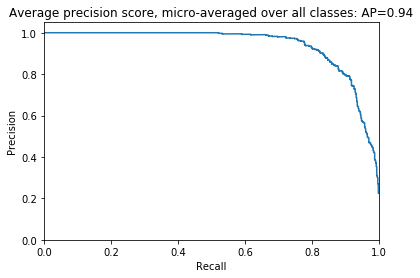

In [111]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

## Plot Precision-Recall curve for each class and iso-f1 curves

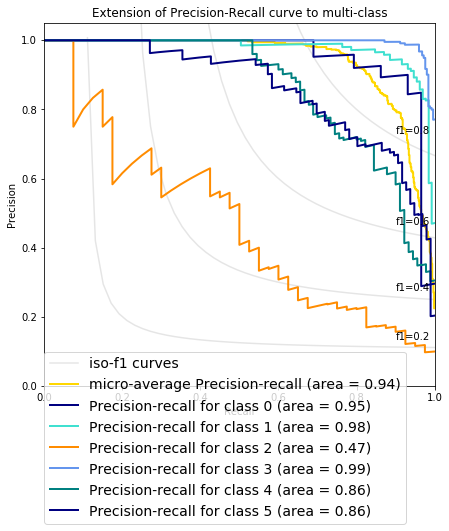

In [112]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()